# Supervised Learning - Project 2 (THERA BANK)

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well

Study the data distribution in each attribute, share your findings. (5 points)

Get the target column distribution. Your comments

Split the data into training and test set in the ratio of 70:30 respectively

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

Print the confusion matrix for all the above models (5 points)

Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# In this section, I have explored the data set and commented on each of the fields

In [3]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
print(bank_df.groupby(["Personal Loan"]).size())
print(bank_df.groupby(["Family"]).size()/len(bank_df["Family"])*100, "\n")
print(bank_df.groupby(["Education"]).size()/len(bank_df["Education"])*100, "\n")
print(bank_df.groupby(["Personal Loan"]).size()/len(bank_df["Personal Loan"])*100, "\n")
print(bank_df.groupby(["Securities Account"]).size()/len(bank_df["Securities Account"])*100, "\n")
print(bank_df.groupby(["CD Account"]).size()/len(bank_df["CD Account"])*100, "\n")
print(bank_df.groupby(["Online"]).size()/len(bank_df["Online"])*100, "\n")
print(bank_df.groupby(["CreditCard"]).size()/len(bank_df["CreditCard"])*100, "\n")

Personal Loan
0    4520
1     480
dtype: int64
Family
1    29.44
2    25.92
3    20.20
4    24.44
dtype: float64 

Education
1    41.92
2    28.06
3    30.02
dtype: float64 

Personal Loan
0    90.4
1     9.6
dtype: float64 

Securities Account
0    89.56
1    10.44
dtype: float64 

CD Account
0    93.96
1     6.04
dtype: float64 

Online
0    40.32
1    59.68
dtype: float64 

CreditCard
0    70.6
1    29.4
dtype: float64 



In [5]:
# Checking for correlation, to better describe the variables
bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


## Deep Dive into Data



Column descriptions - on viewing the data

ID - is the customer ID - This is not required for the model predection Age- Customer Age Experience - # of years Income - Income of the customer (in Thousands shoud be USD based on Zipcode) ZIP Code - Address details of the customer Family - # of members in the family. CCAvg - Credit Card Spend per month Education - 1. Under Graduate 2. Graduate 3. Post Graduate Mortgage- Existing mortgate value Personal Loan - our Y value - did customer accept the Personal Loan in our previous campaign Securities , CD account, Online and Credit card - These are Boolean information which is security account CD account, online internet banking and credit card
Categorical feature:
ordinal:

-Family -Education
nominal:

-ID -Zip Code -Securities Account -CD Account -Online -Credit Card
Numerical feature:

Interval or Ratio:
-Age -Experience -Income -CCAvg -Mortage

There are negative values in the Experience which is

### Working on the incorrect details in the data set

In [13]:
pd.DataFrame(bank_df[bank_df["Experience"]<0][["Age","Experience"]].sort_values("Age"))

#The data sets seems like -  Experience is captured wrongly for the members with the AGE between 23 to 29 
# we will deep dive to understand how to impute them

,Age,Experience
2717,23,-2
3130,23,-2
3425,23,-1
2962,23,-2
909,23,-1
3824,23,-1
4411,23,-2
4285,23,-3
3157,23,-1
2618,23,-3


In [14]:
pd.DataFrame(bank_df[bank_df["Age"]<29][["Age","Experience"]].sort_values("Age"))["Experience"].unique()

array([-2, -1, -3,  0,  1,  2,  3,  4], dtype=int64)

In [15]:
pd.DataFrame(bank_df.groupby("Education").mean()["Experience"])

,Experience
Education,
1,20.065363
2,19.770492
3,20.471686


In [16]:
pd.DataFrame(bank_df.groupby("Age").mean()["Experience"]).head(8)

,Experience
Age,
23,-1.666667
24,-1.071429
25,-0.018868
26,0.961538
27,1.923077
28,2.961165
29,3.715447
30,4.860294


Negative experience is not possible and needs to be replaced. There are two options to conisder

1) Replacing the negative experience with the Absolute value as the information is not too very different from the range value of the experience in relation with the age

2) Alternatively, Considering that all the customers with negative experience are in their twenties, it makes sense to replace the negative values with zero, rather than replace with median.

3) Further, we can also see based on the Standard deviation that Experience is highly correlated with Age in line with our usual understanding of both the fields 

In [20]:
import seaborn as sns

In [21]:
feature = bank_df.drop(["ID","Personal Loan"],axis=1)
feature_contData = bank_df.drop(["ID","Personal Loan","CreditCard","Online","CD Account", "Securities Account","ZIP Code","Education","Family" ], axis =1)
target = bank_df["Personal Loan"]

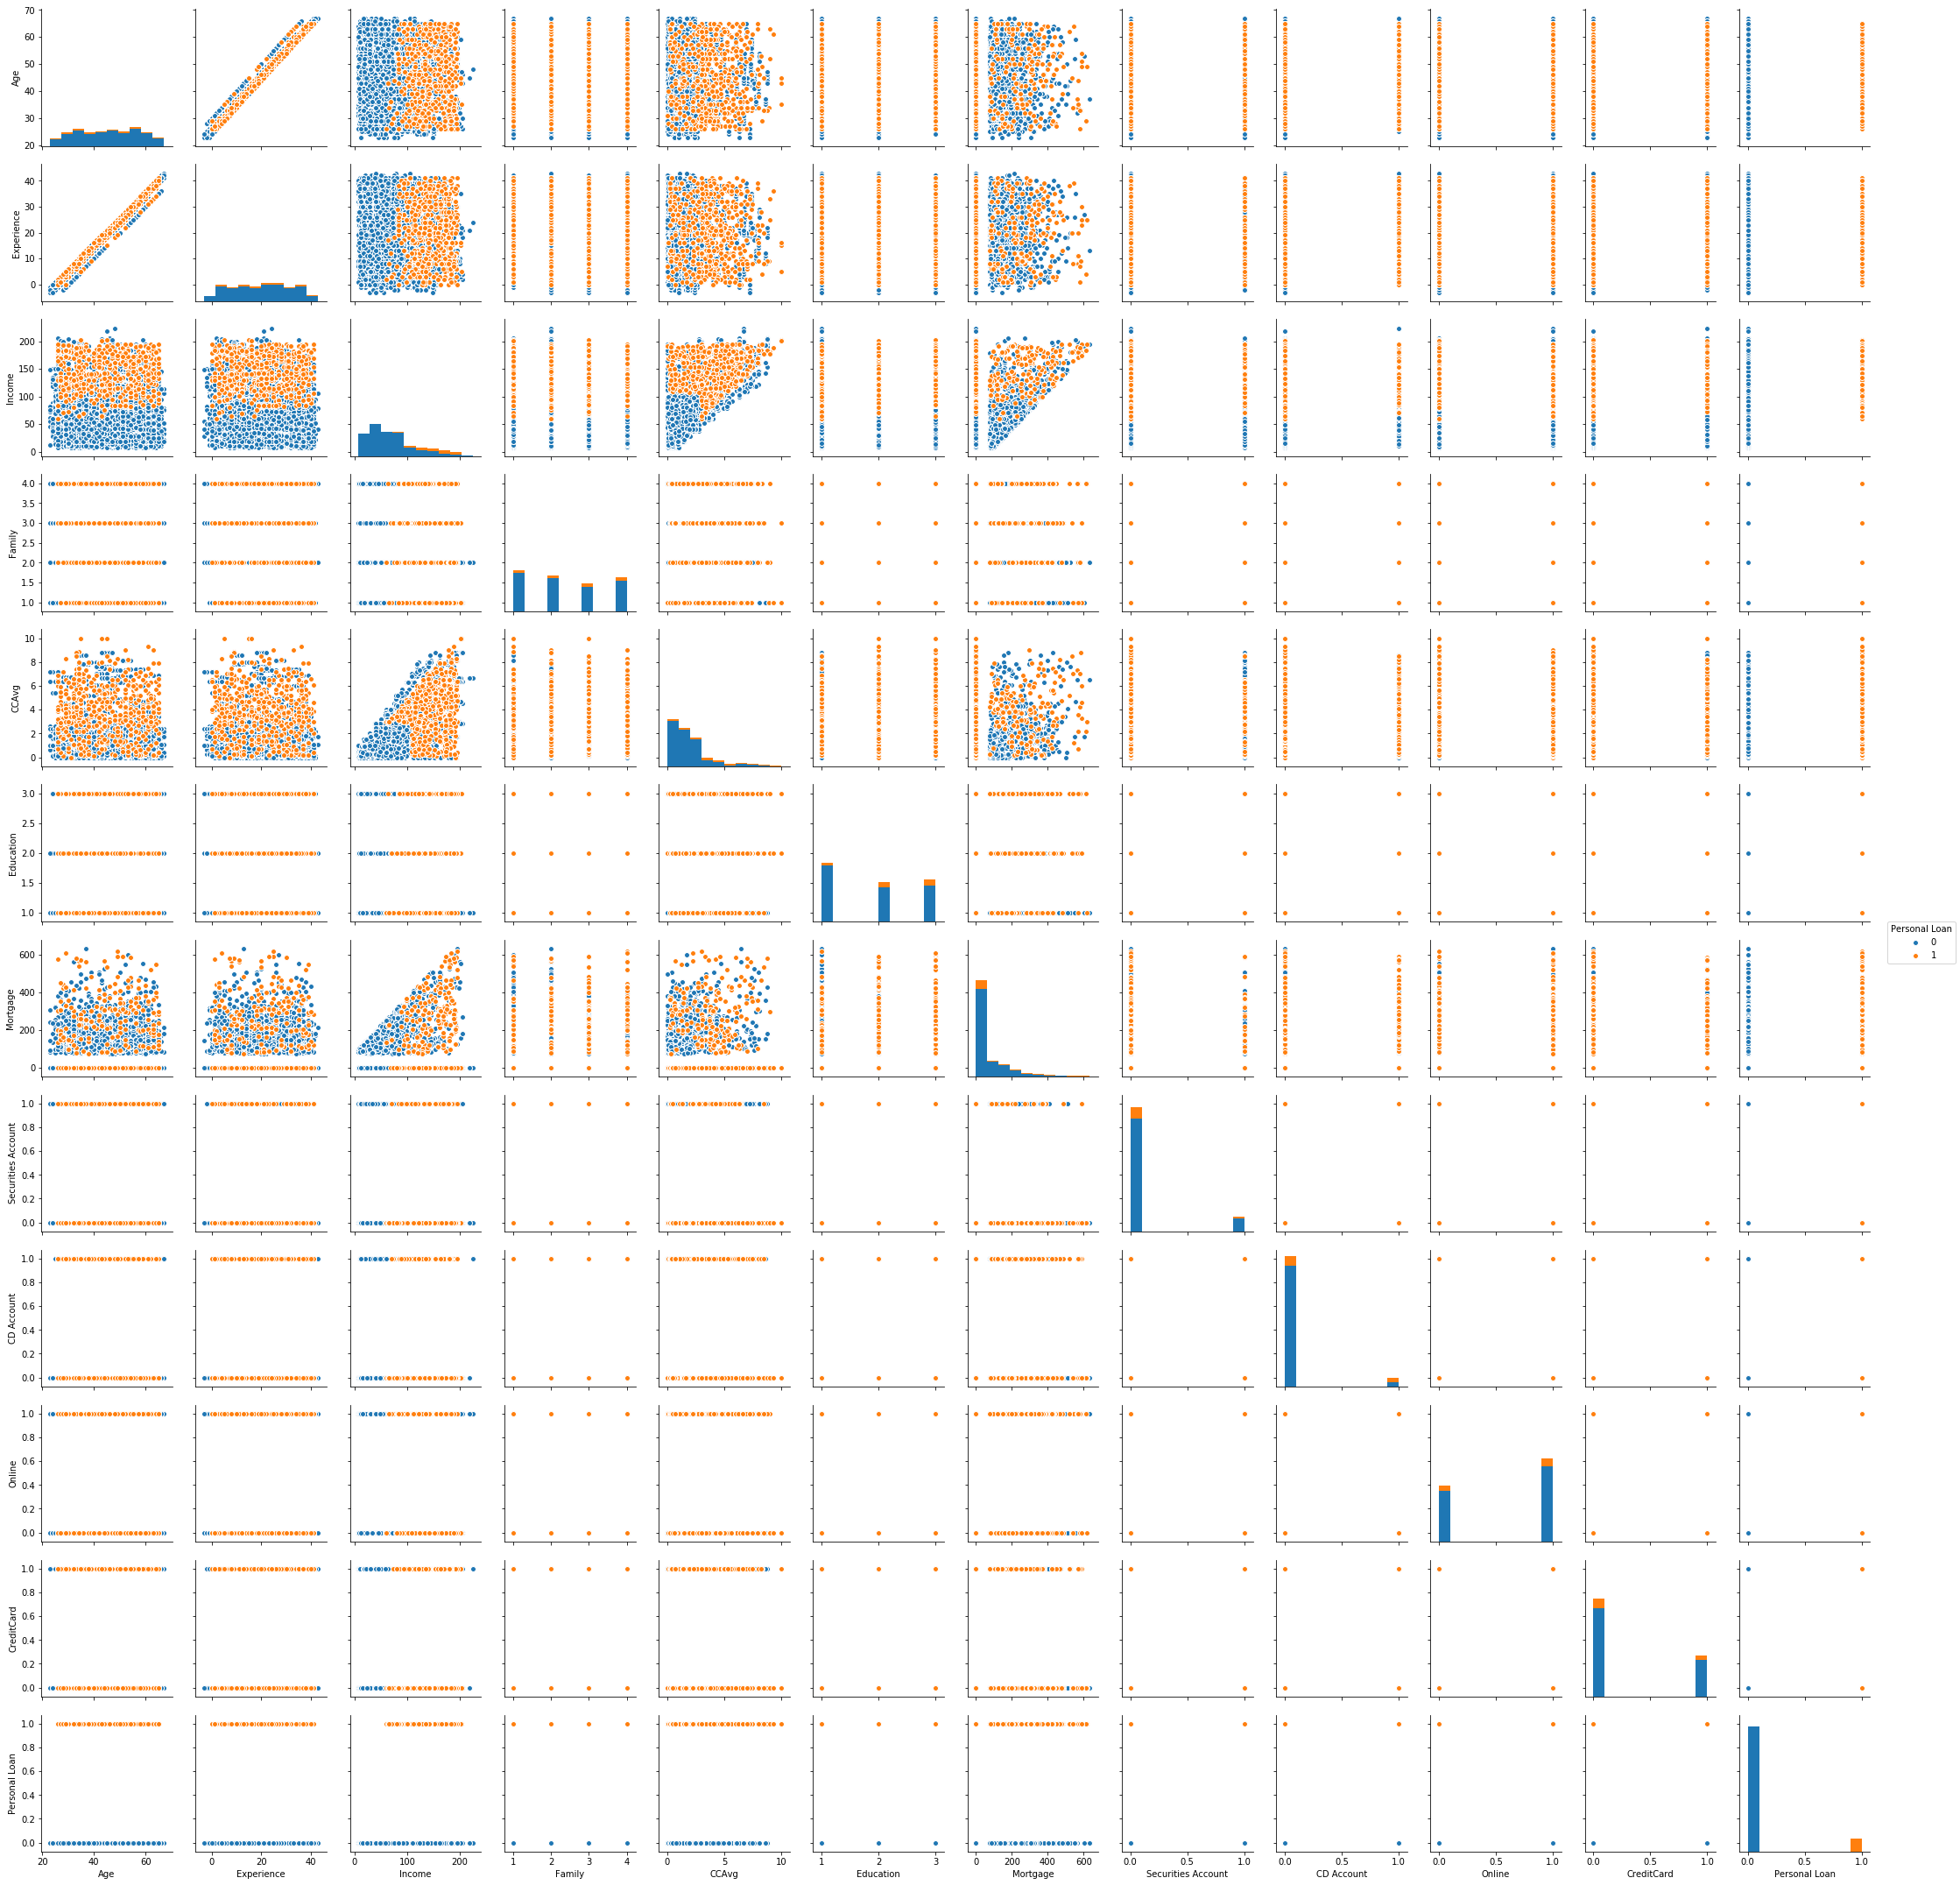

In [22]:
plt.figure(figsize=(20, 20))
sns.pairplot(feature.join(target).drop(["ZIP Code"],axis=1),hue="Personal Loan")

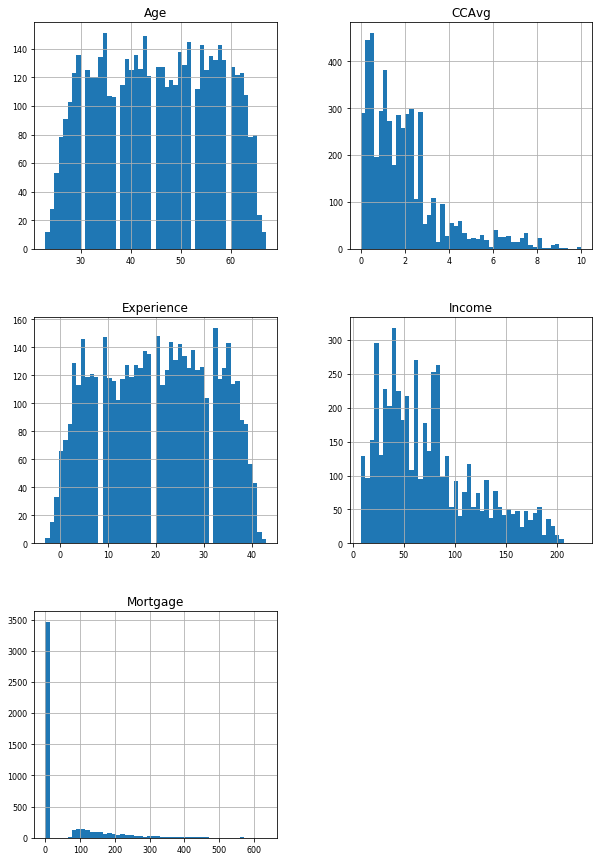

In [23]:
feature_contData.hist(figsize=(10,15),bins = 50,xlabelsize=8,ylabelsize =8,)
plt.show()

(array([4520.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

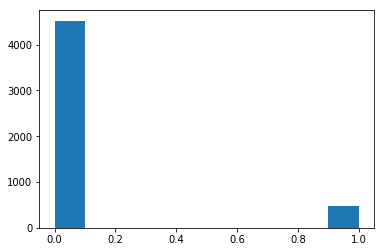

In [17]:
plt.hist(bank_df['Personal Loan'])

In [24]:
# Mortgage neeed to be analyze more ; with the histograme we find there are difference in distribution 
# the histogram is not showing much of info as the data spread is high therefore convert it to log normal

Text(0.5,1,'Income Distribution')

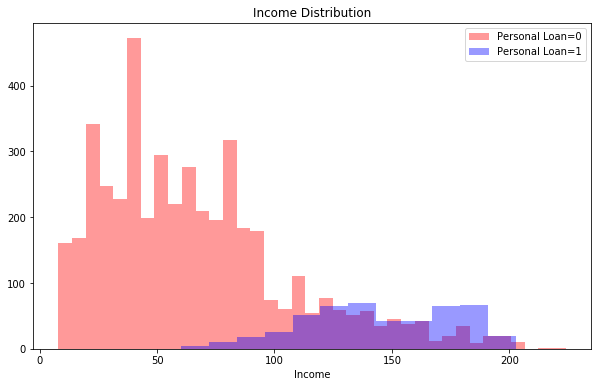

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5,1,'Age Distribution')

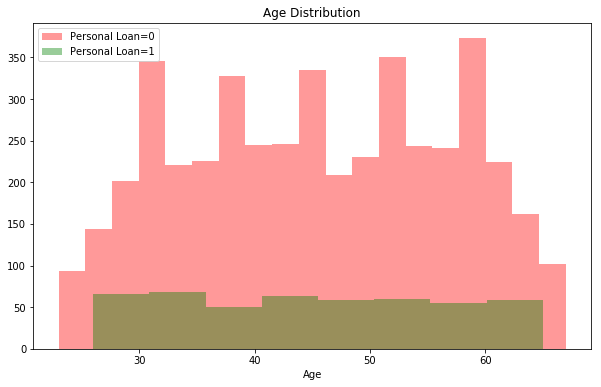

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Age'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Age Distribution")

Text(0.5,1,'CC Average Distribution')

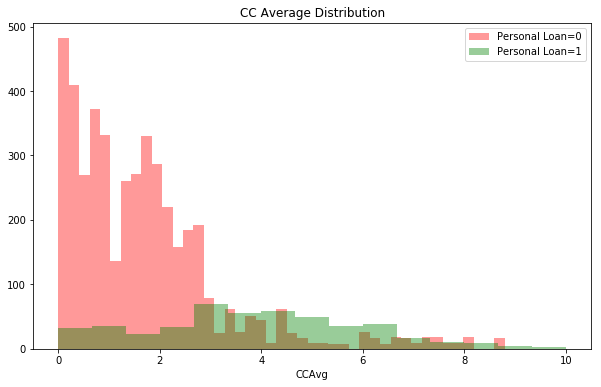

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['CCAvg'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CC Average Distribution")

Text(0.5,1,'Experience Distribution')

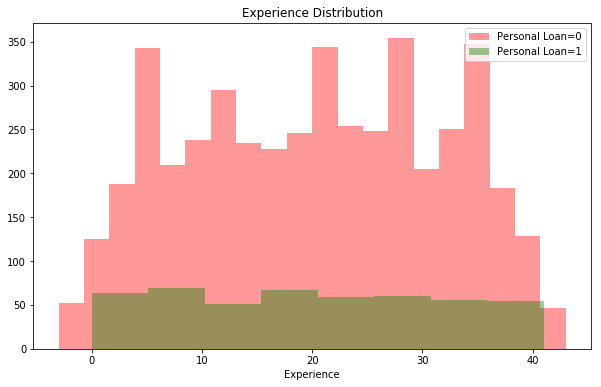

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Experience'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5,1,'Mortgage Distribution')

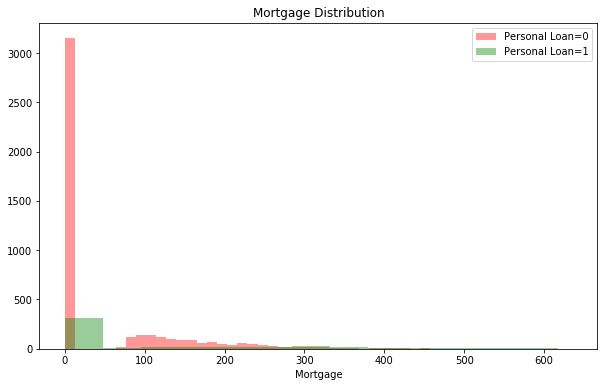

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Mortgage'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Mortgage'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Mortgage Distribution")

Text(0.5,1,'Education and Income Boxplot')

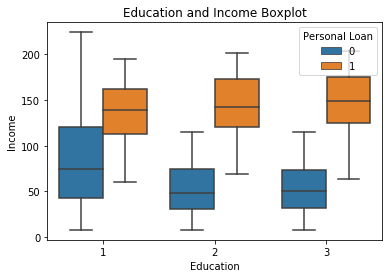

In [31]:
sns.boxplot(x='Education',data=bank_df,hue='Personal Loan',y='Income')
plt.title("Education and Income Boxplot")

Text(0.5,1,'Education and Income Boxplot')

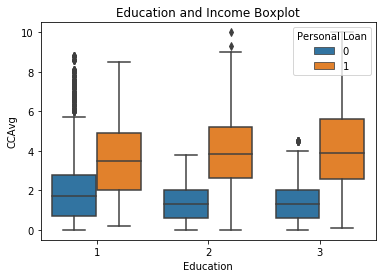

In [32]:
sns.boxplot(x='Education',data=bank_df,hue='Personal Loan',y='CCAvg')
plt.title("Education and Income Boxplot")

Text(0.5,1,'Family Account Countplot')

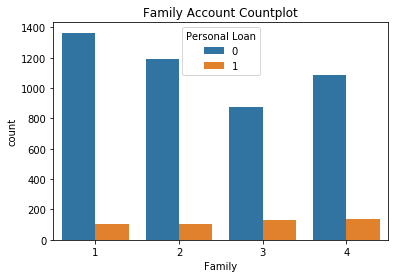

In [33]:
sns.countplot(x='Family',data=bank_df,hue='Personal Loan')
plt.title("Family Account Countplot")

Text(0.5,1,'Securities Account Countplot')

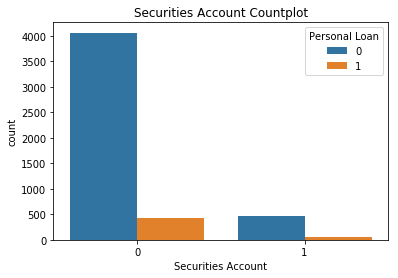

In [34]:
sns.countplot(x='Securities Account',data=bank_df,hue='Personal Loan')
plt.title("Securities Account Countplot")

Text(0.5,1,'CD Account Countplot')

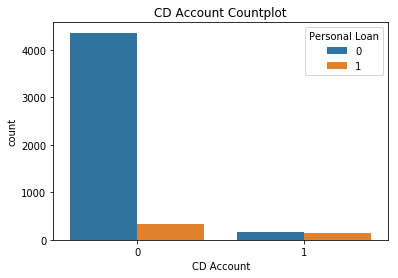

In [35]:
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')
plt.title("CD Account Countplot")

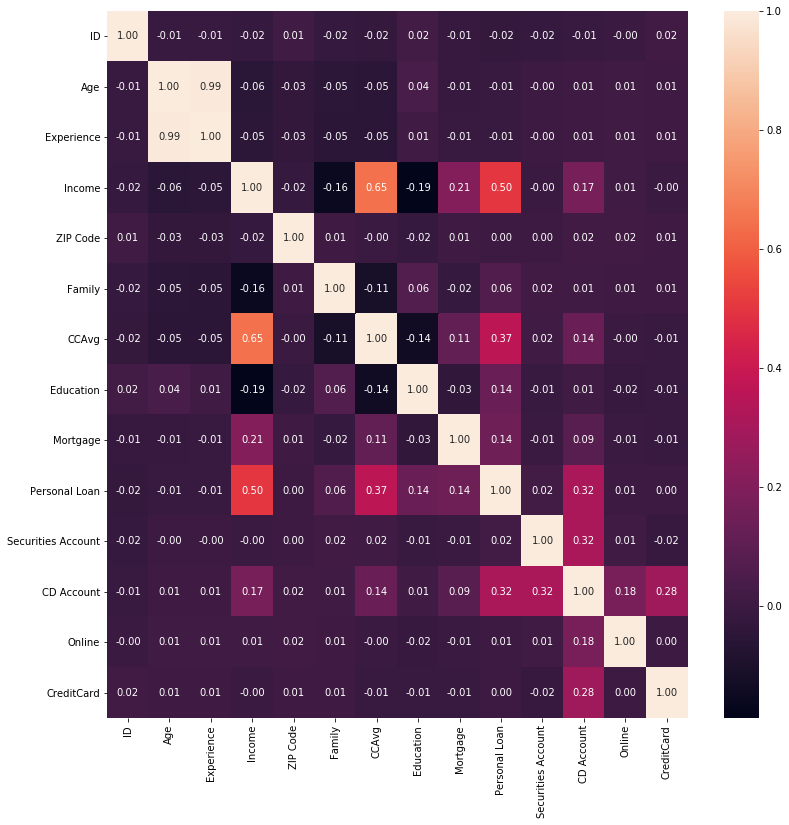

In [19]:
#correlation data
f,ax=plt.subplots(figsize=(13,13))
sns.heatmap(bank_df.corr(),annot=True,ax=ax,fmt=".2f")
plt.xticks(rotation=90)
plt.show()

# Inference from above analysis

As the income increases the probability of the taking loan is high as per the above. Age seems not contributing much to the prediction CC average is a good continuting factor

where as in on verifying relation ship witn bivariate analysis we find he income and education explains most of the informtion.

CC usage with education level 1 got many outliers where the loan has not been consumed. Thats part of the process variation.

CC usage with educaion level 2 where loan has been provided also got some outliers. Thats part of process variation

People who dosent have Security account and CD account are not opting for the loan therefore these calues can be considered for the analysis.

Based on the above analysis we will remove the features like "ID", "ZIP Code","Age","Online","CreditCard" which are not explaining the model

features like "income", "CCAverage", "Education", "Family", "Experience","CD account", "Security account" and "mortgage" explains the model better.


From the correlation heat-map, we can clearly see the high correlation between age and experience. Based on the same, we are dropping Experience column

# Split the data and preparing the model

In [36]:
# Dropping experience and creating a new 
bank_df1=bank_df.drop('Experience', axis=1)

In [37]:
print(bank_df1.columns)

Index(['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')


In [38]:
X = bank_df1.drop("Personal Loan", axis = 1)
y = bank_df1.pop("Personal Loan")

In [39]:
# Based on our observations of the data, it is clear that the data needs to be scaled, which we will do using StandardScaler
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [40]:
# Spliting into Training & Test data in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.30,random_state=0)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

In [41]:
# For calculating model accuracy and confusion matrix
from sklearn import metrics

Logistic Regression Model

In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg_model=LogisticRegression()
LogReg_model.fit(X_train,y_train)


The model score for Logistic Regression model is  0.954


In [43]:
print("Logistic Regression Score on the train data is - ", LogReg_model.score(X_train,y_train))

Logistic Regression Score on the train data is -  0.9502857142857143


In [44]:
y_LogReg_predict=LogReg_model.predict(X_test)

In [46]:
LogReg_model_score=LogReg_model.score(X_test,y_test)
print("Logistic Regression Score on the test data is -", LogReg_model_score)

Logistic Regression Score on the test data is - 0.954


# Evaluation

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1372
          1       0.80      0.61      0.69       128

avg / total       0.95      0.95      0.95      1500



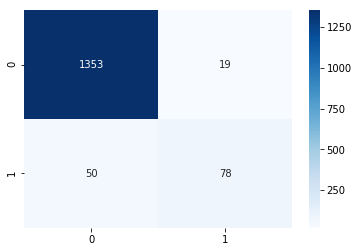

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
print(classification_report(y_test,y_LogReg_predict))
confusion_matrix(y_test,y_LogReg_predict)
sns.heatmap(confusion_matrix(y_test,y_LogReg_predict), annot=True, cmap='Blues',fmt='g')

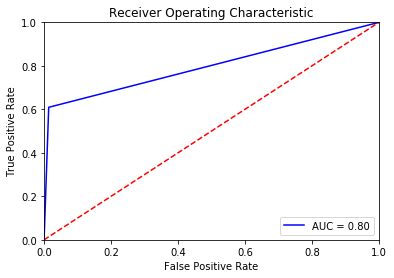

In [50]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = LogReg_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_LogReg_predict)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
LogReg_cr=metrics.classification_report(y_test , y_LogReg_predict)
print(LogReg_cr)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1372
          1       0.80      0.61      0.69       128

avg / total       0.95      0.95      0.95      1500



K-NN Model

In [52]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
# After experimenting a few times, we are getting the best model score with the number of neighbors as 5
KNN_model.fit(X_train,y_train)
y_KNN_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test,y_test)
print("The model score for KNN model is ", KNN_model_score)

The model score for KNN model is  0.9613333333333334


Confusion matrix & Classification Report for KNN Model

[[1367    5]
 [  53   75]]


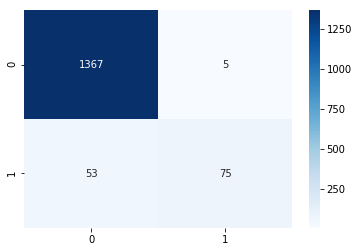

In [54]:
print(metrics.confusion_matrix(y_test,y_KNN_predict))
sns.heatmap(confusion_matrix(y_test,y_KNN_predict), annot=True, cmap='Blues',fmt='g')

In [55]:
KNN_cr=metrics.classification_report(y_test , y_KNN_predict)
print(KNN_cr)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1372
          1       0.94      0.59      0.72       128

avg / total       0.96      0.96      0.96      1500



# Naive_Bayes Model

In [56]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#GaussianNB
GNB_model=GaussianNB()
GNB_model.fit(X_train,y_train)
y_GNB_predict=GNB_model.predict(X_test)
GNB_model_score=GNB_model.score(X_test,y_test)
print("The model score of GaussianNB is ", GNB_model_score)
#BernoulliNB
BNB_model=BernoulliNB()
BNB_model.fit(X_train,y_train)
y_BNB_predict=BNB_model.predict(X_test)
BNB_model_score=BNB_model.score(X_test,y_test)
print("The model score of BernoulliNB is ", BNB_model_score)

The model score of GaussianNB is  0.886
The model score of BernoulliNB is  0.9253333333333333


Confusion matrix & Classification Report for GaussianNB

[[1254  118]
 [  53   75]]


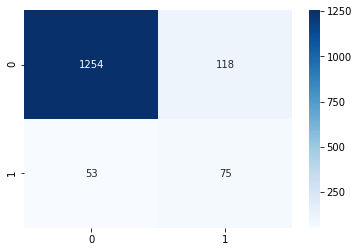

In [57]:
print(metrics.confusion_matrix(y_test,y_GNB_predict))
sns.heatmap(confusion_matrix(y_test,y_GNB_predict), annot=True, cmap='Blues',fmt='g')

In [58]:
GNB_cr=metrics.classification_report(y_test , y_GNB_predict)
print(GNB_cr)

             precision    recall  f1-score   support

          0       0.96      0.91      0.94      1372
          1       0.39      0.59      0.47       128

avg / total       0.91      0.89      0.90      1500



Confusion matrix & Classification Report for BernoulliNB

[[1349   23]
 [  89   39]]


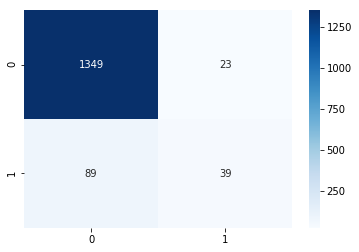

In [59]:
print(metrics.confusion_matrix(y_test,y_BNB_predict))
sns.heatmap(confusion_matrix(y_test,y_BNB_predict), annot=True, cmap='Blues',fmt='g')

In [60]:
BNB_cr=metrics.classification_report(y_test , y_BNB_predict)
print(BNB_cr)

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1372
          1       0.63      0.30      0.41       128

avg / total       0.91      0.93      0.91      1500



# Give your reasoning on which is the best model in this case and why it performs better? 

Based on the model scores, confusion matrices and classification reports, it is clear that the KNN model is the most effective predictor of the customer's likelihood of taking a personal loan.

The KNN model is most effective in this case, as there is low correlation between independent variables (apart from the ones already removed). So in the given dimension space, the Nearest Neighbours approach is the one likely to be most effective